In [1]:
import numpy
import matplotlib
from scipy.signal import hilbert, chirp 
import scipy.signal as signal
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
data3=loadtxt('051018.txt',skiprows=1)

In [3]:
print max(data3[:,2])

4743.0


In [4]:
print min(data3[:,2])

0.0


In [5]:
print max(data3[:,0]),min(data3[:,0]),max(data3[:,1]),min(data3[:,1])

999.0 0.0 255.5 0.0


In [6]:
x=arange(0,999)
y=arange(0,256,0.5)
shape(y)

(512,)

In [7]:
ix=999 
iy=512

In [8]:
z=zeros(ix*iy).reshape(iy,ix)

In [9]:
k=0
for j in range(ix):
    for i in range(iy):
        z[i,j]=float(data3[k,2])
        # G[i,j]=data2[int(z[i,j])]
 
        k=k+1
        
        

In [10]:
G=zeros(ix*iy).reshape(iy,ix)
Gh=zeros(ix*iy).reshape(iy,ix)

In [11]:

k=0
for j in range(ix):
    for i in range(iy):
        G[i,j]=float(data3[k,2])
        #G[i,j]=data2[int(z[i,j])]
        
        k=k+1
        

<matplotlib.colorbar.Colorbar instance at 0x161C9B20>

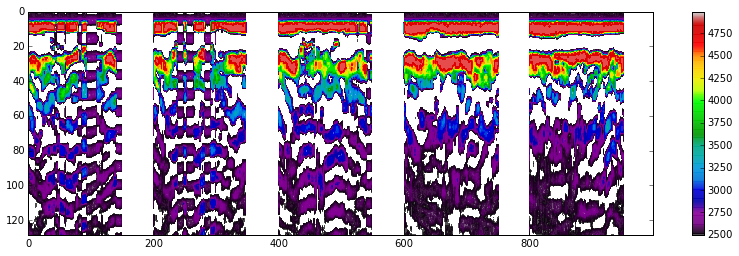

In [12]:
plt.figure(figsize=(14,4))
ylim(128.5,0)
levels=arange(2500,5000,10)
contourf(x,y,G,levels,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()


### Баттерворт фильтр

In [13]:
Gb=zeros(ix*iy).reshape(iy,ix)
N=len(Gb[:,0])
freq=1./float(N)
# First, design the Buterworth filter
N  = 3    # Filter order
#Wn = 0.01 # Cutoff frequency
Wn=25.*freq
for i in range(ix):
    B, A = signal.butter(N, Wn, output='ba')
    # Second, apply the filter
    Gb[:,i] = signal.filtfilt(B,A,G[:,i] )

In [14]:
signal=zeros(iy)
for i in range(ix):
    signal=Gb[:,i]-mean(Gb[:,i])
    analytic_signal = hilbert(signal)
    amplitude_envelope = np.abs(analytic_signal)
    Gh[:,i]=amplitude_envelope


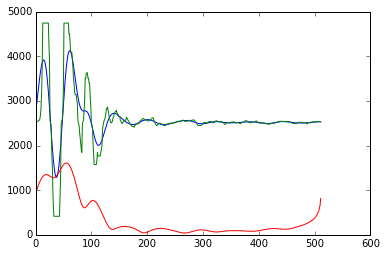

In [15]:
plot(Gb[:,10])
plot(G[:,10])
plot (Gh[:,10])

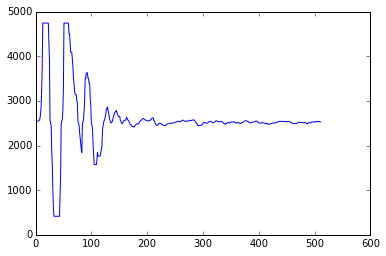

In [16]:
plot(z[:,10])

<matplotlib.colorbar.Colorbar instance at 0x1AF959B8>

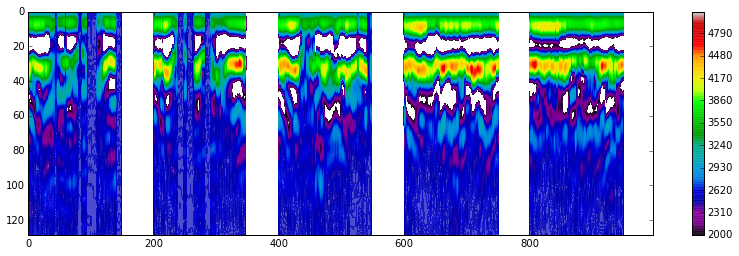

In [17]:
print 
plt.figure(figsize=(14,4))
#ylim(255.5,0)
ylim(128.5,0)
levels=arange(2000,5100,10)
contourf(x,y,Gb,levels,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()


<matplotlib.colorbar.Colorbar instance at 0x2281D670>

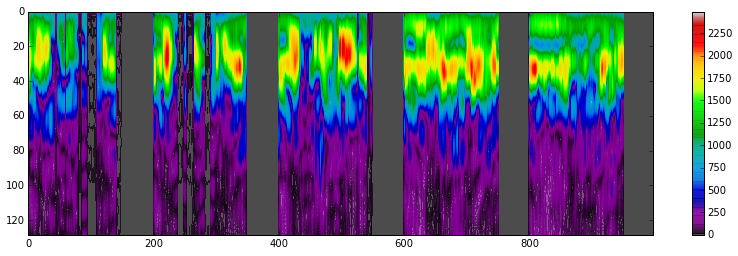

In [18]:
#преобразование Гильберта (для определения среды)
plt.figure(figsize=(14,4))
ylim(128.5,0)
levels=arange(0,2500,10)
#levels=arange(4,8,0.05)
contourf(x,y,Gh,levels,alpha=0.7,cmap=cm.nipy_spectral)
colorbar()
